# 텐서 표현과 연산
---
## 1. 텐서(Tensor)
---
데이터를 담기위한 컨테이너(container)  
다차원 배열 또는 리스트 형태
일반적으로 수치형 데이터를 저장하고, 동적 크기를 가진다

![Alt text](image.png)  
- Rank: 축의 개수
- Shape: 형상(각 축에 따른 차원 개수)
- Type: 데이터 타입

### 1DTensor(Vector)
리스트와 유사한 형태, 벡터(vector)  
### 2DTensor(Matrix)
일반적인 수치, 통계 데이터 셋  
주로 샘플(samples)과 특성(features)을 가진 구조  
### 3DTensor
큐브 형태, 연속된 시퀀스 또는 시계열 데이터    
주로 샘플(samples), 특성(features), 타임스텝(timesteps) 을 가진 구조  
### 4DTensor
컬러이미지 데이터 (흑백 이미지는 3DTensor로 표현 가능)  
주로 샘플(samples), 채널(channel), 높이(height), 너비(weight) 을 가진 구조  
### 5DTensor
비디오 데이터  
주로 샘플(samples), 프레임(frames), 채널(channel), 높이(height), 너비(weight) 을 가진 구조  

#### 0DTensor(Scalar) : 하나의 숫자를 담고 있는 텐서, 축과 형상이 없다


In [56]:
import tensorflow as tf

# tf.constant() : 텐서 상수를 생성
t0 = tf.constant(1) # 1DTensor
print(t0)

# tf.rank(텐서) : 텐서 축의 개수를 반환합니다.
print(tf.rank(t0))  

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


---
## 텐서의 타입
---
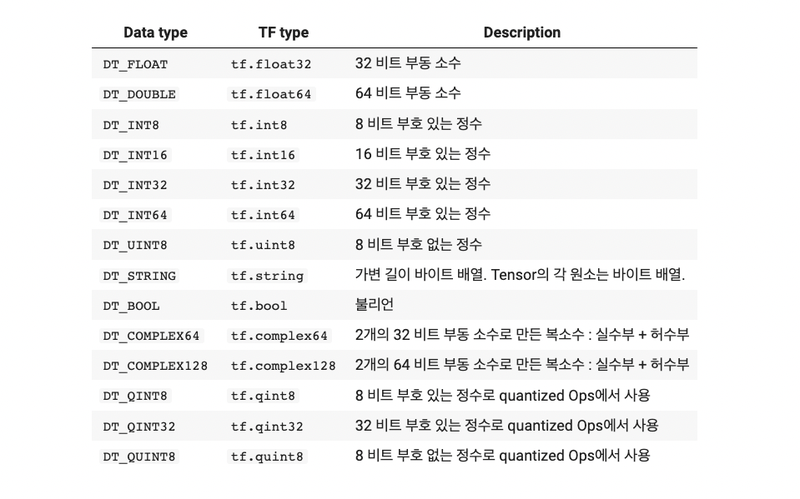  

### 텐서 변환 함수
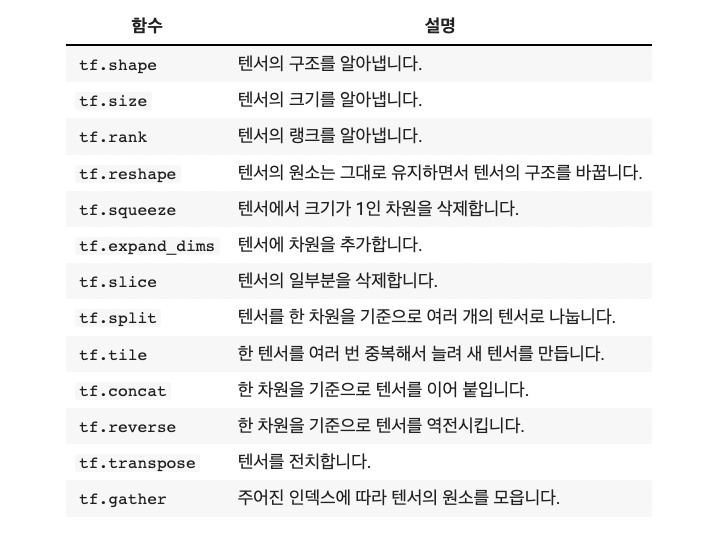  

In [57]:
# tf.constant : 텐서 생성 시 dtype 지정 가능
f16 = tf.constant(2., dtype=tf.float16)
print(f16)

print('>>>>>>>>>>>>>>>>>>>>> cast >>>>>>>>>>>>>>>>>>>>')

# tf.cast(텐서, 타입) : 텐서 타입 변환
f32 = tf.cast(f16, tf.float32)
print(f32)

tf.Tensor(2.0, shape=(), dtype=float16)
>>>>>>>>>>>>>>>>>>>>> cast >>>>>>>>>>>>>>>>>>>>
tf.Tensor(2.0, shape=(), dtype=float32)


In [58]:
# tf.reshape : 텐서 텐서의 원소는 그대로 유지하면서 형상 변환
x = tf.constant([[1], [2], [3]])
print(x)
print('>>>>>>>>>>>>>>>>>>>>> reshape[1, 3] >>>>>>>>>>>>>>>>>>>>>')
y = tf.reshape(x, [1, 3])
print(y)
# tf.transpose : 텐서를 전치
print('>>>>>>>>>>>>>>>>>>>>> transpose >>>>>>>>>>>>>>>>>>>>')
print(tf.transpose(y))

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32)
>>>>>>>>>>>>>>>>>>>>> reshape[1, 3] >>>>>>>>>>>>>>>>>>>>>
tf.Tensor([[1 2 3]], shape=(1, 3), dtype=int32)
>>>>>>>>>>>>>>>>>>>>> transpose >>>>>>>>>>>>>>>>>>>>
tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32)


In [59]:
# tf.squeeze : 크기가 1인 차원 제거
print(x)
print('>>>>>>>>>>>>>>>>>>>>> squeeze >>>>>>>>>>>>>>>>>>>>')
print(tf.squeeze(x))

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32)
>>>>>>>>>>>>>>>>>>>>> squeeze >>>>>>>>>>>>>>>>>>>>
tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [60]:
# tf.expand_dims : 차원 추가
print(y)
print('>>>>>>>>>>>>>>>>>>>>> axis=0 >>>>>>>>>>>>>>>>>>>>')
print(tf.expand_dims(y, axis=0))
print('>>>>>>>>>>>>>>>>>>>>> axis=1 >>>>>>>>>>>>>>>>>>>>')
print(tf.expand_dims(y, axis=1))
print('>>>>>>>>>>>>>>>>>>>>> axis=2 >>>>>>>>>>>>>>>>>>>>')
print(tf.expand_dims(y, axis=2))

tf.Tensor([[1 2 3]], shape=(1, 3), dtype=int32)
>>>>>>>>>>>>>>>>>>>>> axis=0 >>>>>>>>>>>>>>>>>>>>
tf.Tensor([[[1 2 3]]], shape=(1, 1, 3), dtype=int32)
>>>>>>>>>>>>>>>>>>>>> axis=1 >>>>>>>>>>>>>>>>>>>>
tf.Tensor([[[1 2 3]]], shape=(1, 1, 3), dtype=int32)
>>>>>>>>>>>>>>>>>>>>> axis=2 >>>>>>>>>>>>>>>>>>>>
tf.Tensor(
[[[1]
  [2]
  [3]]], shape=(1, 3, 1), dtype=int32)


In [61]:
# tf.split : 텐서 분리
print(x)
print('>>>>>>>>>>>>>>>>>>>>> split 3 >>>>>>>>>>>>>>>>>>>>')
y = tf.split(x, 3)
for i in y:
    print(i)

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32)
>>>>>>>>>>>>>>>>>>>>> split 3 >>>>>>>>>>>>>>>>>>>>
tf.Tensor([[1]], shape=(1, 1), dtype=int32)
tf.Tensor([[2]], shape=(1, 1), dtype=int32)
tf.Tensor([[3]], shape=(1, 1), dtype=int32)


In [62]:
print(x)
print('>>>>>>>>>>>>>>>>>>>>> concat axis=0 >>>>>>>>>>>>>>>>>>>>')
print(tf.concat([x, x], axis=0))
print('>>>>>>>>>>>>>>>>>>>>> concat axis=1 >>>>>>>>>>>>>>>>>>>>')
print(tf.concat([x, x], axis=1))

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32)
>>>>>>>>>>>>>>>>>>>>> concat axis=0 >>>>>>>>>>>>>>>>>>>>
tf.Tensor(
[[1]
 [2]
 [3]
 [1]
 [2]
 [3]], shape=(6, 1), dtype=int32)
>>>>>>>>>>>>>>>>>>>>> concat axis=1 >>>>>>>>>>>>>>>>>>>>
tf.Tensor(
[[1 1]
 [2 2]
 [3 3]], shape=(3, 2), dtype=int32)


---
## 텐서 연산
---
### 0차원 텐서 연산

In [63]:
print(tf.constant(2) + tf.constant(2))
print(tf.constant(2) - tf.constant(2))
print(tf.add(tf.constant(2), tf.constant(2)))
print(tf.subtract(tf.constant(2), tf.constant(2)))

print(tf.constant(2) * tf.constant(2))
print(tf.constant(2) / tf.constant(2))
print(tf.multiply(tf.constant(2), tf.constant(2)))
print(tf.divide(tf.constant(2), tf.constant(2)))

# 서로 다른 타입 텐서 연산시 에러 발생 >> tf.cast 활용
#print(tf.constant(2) + tf.constant(2.2))
print(tf.cast(tf.constant(2), tf.float32) + tf.constant(2.2))

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(1.0, shape=(), dtype=float64)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(1.0, shape=(), dtype=float64)
tf.Tensor(4.2, shape=(), dtype=float32)


### 1차원 이상의 텐서 연산
텐서의 모양이 직사각형이거나 연산이 가능하도록 형상을 맞춰주어야 한다

In [64]:
t1 = tf.constant([1,2])
t2 = tf.constant([3,4])

# 1차원 텐서 사칙연산
print(t1 + t2)
print(tf.add(t1, t2))
print(t1 - t2)
print(tf.subtract(t1, t2))
print(t1 * t2)
print(tf.multiply(t1, t2))
print(t1 / t2)
print(tf.divide(t1, t2))

tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor([-2 -2], shape=(2,), dtype=int32)
tf.Tensor([-2 -2], shape=(2,), dtype=int32)
tf.Tensor([3 8], shape=(2,), dtype=int32)
tf.Tensor([3 8], shape=(2,), dtype=int32)
tf.Tensor([0.33333333 0.5       ], shape=(2,), dtype=float64)
tf.Tensor([0.33333333 0.5       ], shape=(2,), dtype=float64)


In [65]:
t1 = tf.constant([[1,2], [3,4]])
t2 = tf.constant([[3,4], [5,6]])

# 2차원 텐서 사칙연산
print(t1 + t2)
print(tf.add(t1, t2))
print(t1 - t2)
print(tf.subtract(t1, t2))
print(t1 * t2)
print(tf.multiply(t1, t2))
print(t1 / t2)
print(tf.divide(t1, t2))

print(t1 @ t2) # 행렬의 곱 연산
print(tf.matmul(t1, t2)) # matrix multiplication 

tf.Tensor(
[[ 4  6]
 [ 8 10]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 4  6]
 [ 8 10]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[-2 -2]
 [-2 -2]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[-2 -2]
 [-2 -2]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 3  8]
 [15 24]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 3  8]
 [15 24]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[0.33333333 0.5       ]
 [0.6        0.66666667]], shape=(2, 2), dtype=float64)
tf.Tensor(
[[0.33333333 0.5       ]
 [0.6        0.66666667]], shape=(2, 2), dtype=float64)
tf.Tensor(
[[13 16]
 [29 36]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[13 16]
 [29 36]], shape=(2, 2), dtype=int32)


In [66]:
'''
reduce_max(): 텐서 값 중에서 최대값을 계산합니다.
argmax(): 최대값의 위치를 반환합니다. 
nn.softmax(): 텐서의 값을 0과 1 사이의 값으로 보여줍니다.
'''
c = tf.constant([[4.0, 5.0, 6.0], 
                 [10.0, 9.0, 8.0]])

print(tf.reduce_max(c))
print(tf.argmax(c))
print(tf.nn.softmax(c))


tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1 1 1], shape=(3,), dtype=int64)
tf.Tensor(
[[0.09003057 0.24472848 0.66524094]
 [0.66524094 0.24472848 0.09003057]], shape=(2, 3), dtype=float32)
